<h2 style='color: green; font-size: 36px; font-weight: bold;'>Crecimiento Impulsado por Datos</h2>


**Identificador del proyecto:** BI007_CL001_mlapi_dashboard_metricas_del_negocio

<h2 style='color: green; font-size: 24px; font-weight: bold;'>Conociendo las métricas del negocio</h2>

## <font color='green' style='font-size: 24px;'>Definición del problema</font>
<hr style='border: 1px solid green;'>

**Problema:**  Completar un notebook Jupiter que sirva de modelo para analizar, preprocesar e identificar las métricas y KPI a partir de los datos de ventas de un negocio de retail (minorista) y se pueda implementar y ejecutar en Google Colab.

**Descripción:**


## <font color='green' style='font-size: 24px;'>Conociendo el dataset</font>
<hr style='border: 1px solid green;'>

**Observación:**

El data set fuente se actualiza regularmente así que sus datos así como la estructura pueden ser muy diferentes a los del data set usado en este proyecto. Se recomienda hacer las adaptaciones que sean necesarias tanto al data set como al código de este notebook para seguir la lógica (algoritmo) del proyecto.

Fuente: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

**Diccionario de datos:**
- fecha - Fecha
- temp_media - Temperatura Media (°C)
- temp_min - Temperatura Mínima (°C)
- temp_max - Temperatura Máxima (°C)
- lluvia - Precipitación (mm)
- fds - Fin de Semana (1 = Sí; 0 = No)
- consumo - Consumo de Cerveza (litros)

## <font color='green' style='font-size: 24px;'>Tabla de contenido</font>
<hr style='border: 1px solid green;'>

#### **Procesos ETL**

- Preparación del data set
    - Calidad del dato (Henry - Modulo3 - clase2)
        - Actualización
        - Trazabilidad
        - Fiabilidad
    - Preparación de datos crudos (con Power BI o modulo separado en  Python)
        - Integración
          - Tabulación de formato de archivos
          - Selección de columnas relevantes
        - Limpieza
          - Filas vacias
          - Filas duplicadas
          - Columnas redundantes
        - Estandarización
          - Etiquetas o valores de categorías
          - Formato de  fechas
          - Separadores de columnas
          - formato de separadores decimales
          - Formato de caracteres UTF

#### **Contenido del Notebook**


- Preparar el entorno de trabajo
    1. Configuración para Google Colab
    2. Configuración para todos los entornos
    3. Carga del dataframe
- EDA (Exploratory Data Analysis)
    1. Información sobre las variables del Dataframe
    2. Descriptivos y Resumen Estadístico*
    3. Análisis gráfico de datos
          - Detección de valores faltantes
          - Identificación de valores atipicos (Outliers)
          - Análisis de Correlación.*
          - Identificación de Patrones y Tendencias*
- Preprocesamiento - Data Wrangling
    1. Estandarizar campos
    2. Manejo de Valores Faltantes
    3. Tratamiento de Outliers
    4. Generación de nuevas variables
- Metricas y KPIs mensuales
    1. Monthly Revenue (Ingresos brutos mensuales)
    2. Monthly Invoices (Ordenes o facturas mensuales)
    3. Monthly Order Count (Recuento de pedidos mensuales)
    4. Average Revenue per Order (Ingreso promedio por orden)
    5. Monthly Active Customers (Clientes activos mensuales)
    6. Cantidad clientes retenidos por mes
    7. Repeat Purchase Rate - Tasa de retención de clientes
    8. Ingresos mensuales por tipo de cliente (nuevo o retenido en el mes)
    9. New Customer Ratio (Tasa mensual de nuevos clientes)
    10. Monthly Revenue Growth Rate (Tasa de variación mensual de ingresos)
- Metricas y KPIs por cliente
    1. Ingresos total por cliente
    2. ARPU - Ingresos promedio mensual por cliente
    3. LTV -  Tiempo de Vida de Valor por cliente *
    4. CAC (Customer Acquisition Cost - Costo de adquisicion por cliente) *
    5. Margen de ganancia por cliente *
    6. CLV (Customer Lifetime Value - Tiempo de vida de valor del cliente) *
- Metricas y KPIs por cohorte
    1. Cantidad de clientes por cohorte *
    2. Cohort Based Retention Rate (Tasa de retención por cohorte)
    3. Tasa de deserción por cohorte - Cohort Based Churn Rate *
    4. LTV de la cohorte *

## <font color='green' style='font-size: 24px;'>Preparar el entorno de trabajo</font>
<hr style='border: 1px solid green;'>

**Contenido de esta sección:**
1. Configuración para Google Colab
2. Configuración para todos los entornos
3. Carga del dataframe

### <font color='orange' style='font-size: 24px;'>1. Configuración para Google Colab</font>
<hr>

**Conectar con drive de Google**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


¿Cómo pasar la ruta del archivo dataset cuando hay espacios en blanco en nombres de la ruta?
Respuesta: Convertir a una cadena de caracteres encerrando entre comillas simples o dobles toda la ruta incluyendo el nombre del archivo

In [2]:
pip install -r "/content/drive/MyDrive/Colab Notebooks/BI007_CL001_metricas_del_negocio/requirements.txt"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


%matplotlib inline
Runtime error: chart is displayed blank.
When using Google Colab use the overall import statements below, this will set the rendering to Colab style and the plots will be displayed.
import plotly.offline as pyoff
initiate visualization library for jupyter notebook
pyoff.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'

In [3]:
# Importar bibliotecas
import plotly.graph_objects as go
import plotly.express as px
from google.colab import output

# Configurar soporte para gráficos interactivos
output.enable_custom_widget_manager()

La librería plotly.express es un módulo de Plotly que proporciona una interfaz de alto nivel para crear gráficos de manera sencilla y eficiente. Es ideal para generar gráficos interactivos como líneas, dispersión, histogramas, mapas, etc., con menos código en comparación con el módulo plotly.graph_objects.

In [4]:
# ¿Cual es la manera recomendada para fijar la ruta de un archivo dataset para cargarlo en Google Colab?
# Respuesta: Asignar la ruta a un string y pasarlo como parametro al método pd.read_csv()
folder_datasets_path = '/content/drive/MyDrive/Colab Notebooks/BI007_CL001_metricas_del_negocio/datasets/'

### <font color='orange' style='font-size: 24px;'>2. Configuración para todos los entornos</font>
<hr>

**Importar librerias generales**

In [5]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans

#Biblioteca para tratar valores faltantes
import missingno as msno

# **ImportError: The plotly.plotly module is deprecated, Solution : use the chart_studio.plotly module instead. **
import chart_studio.plotly as py
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
# import warnings
# warnings.filterwarnings('ignore') #warnings.filterwarnings('once')

In [ ]:
# Si el entorno es local y no en Google Colab entonces inicializar la variable que contiene la ruta del archivo local
folder_datasets_path = 'datasets/'

### <font color='orange' style='font-size: 24px;'>3. Cargar el dataset en un dataframe</font>
<hr>

In [8]:
# sales_data_file='ventas_ferreteria.csv'
# data_file_path=folder_datasets_path+sales_data_file
# ventas_generales_df= pd.read_csv(data_file_path, sep=';', encoding= 'utf8')

In [9]:
# sales_data_file='sales_data_sample.csv'
# sales_data_file= 'Telco-Customer-Churn.csv'
# sales_data_file= 'customer_churn2.csv'
sales_data_file= 'OnlineRetail2b.csv'
data_file_path=folder_datasets_path+sales_data_file
ventas_generales_df= pd.read_csv(data_file_path, sep=',', encoding= 'unicode_escape')

## <font color='green' style='font-size: 24px;'>EDA - Exploratory Data Analysis </font>
<hr style='border: 1px solid green;'>

**Contenido de esta sección:**
1. Información sobre las variables del Dataframe
2. Descriptivos y Resumen Estadístico*
3. Análisis gráfico de datos
   - 3.1. Detección de valores faltantes
   - 3.2. Identificación de valores atipicos (Outliers)
   - 3.3. Análisis de Correlación.*
   - 3.4.Identificación de Patrones y Tendencias*

### <font color='orange' style='font-size: 24px;'>1. Información sobre las variables del Dataframe</font>  
<hr>

**Identificar las variables y tipos de datos**

In [ ]:
# Tamaño del datset (total de registros)
ventas_generales_df.shape[0]

354345

In [ ]:
# Nombres, tipos de datos y cantidad de valores no nulos de las variables que conforman el data set
ventas_generales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354345 entries, 0 to 354344
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  int64  
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      354345 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 21.6+ MB


### <font color='orange' style='font-size: 24px;'>2. Descriptivos y Resumen Estadístico*</font>  
<hr>

**Estadísticos descriptivos**

In [ ]:
# Medidas de tendencia central y de distribucion de las variables del dataset
# ventas_generales_df.describe().round(2)

### <font color='orange' style='font-size: 24px;'>3. Análisis gráfico de datos</font>  
<hr>

**Contenido de esta sección:**
- 3.1. Detección de valores faltantes
- 3.2. Identificación de valores atipicos (Outliers)
- 3.3. Análisis de Correlación.*
- 3.4.Identificación de Patrones y Tendencias*

#### **3.1. Deteccion de valores faltantes**

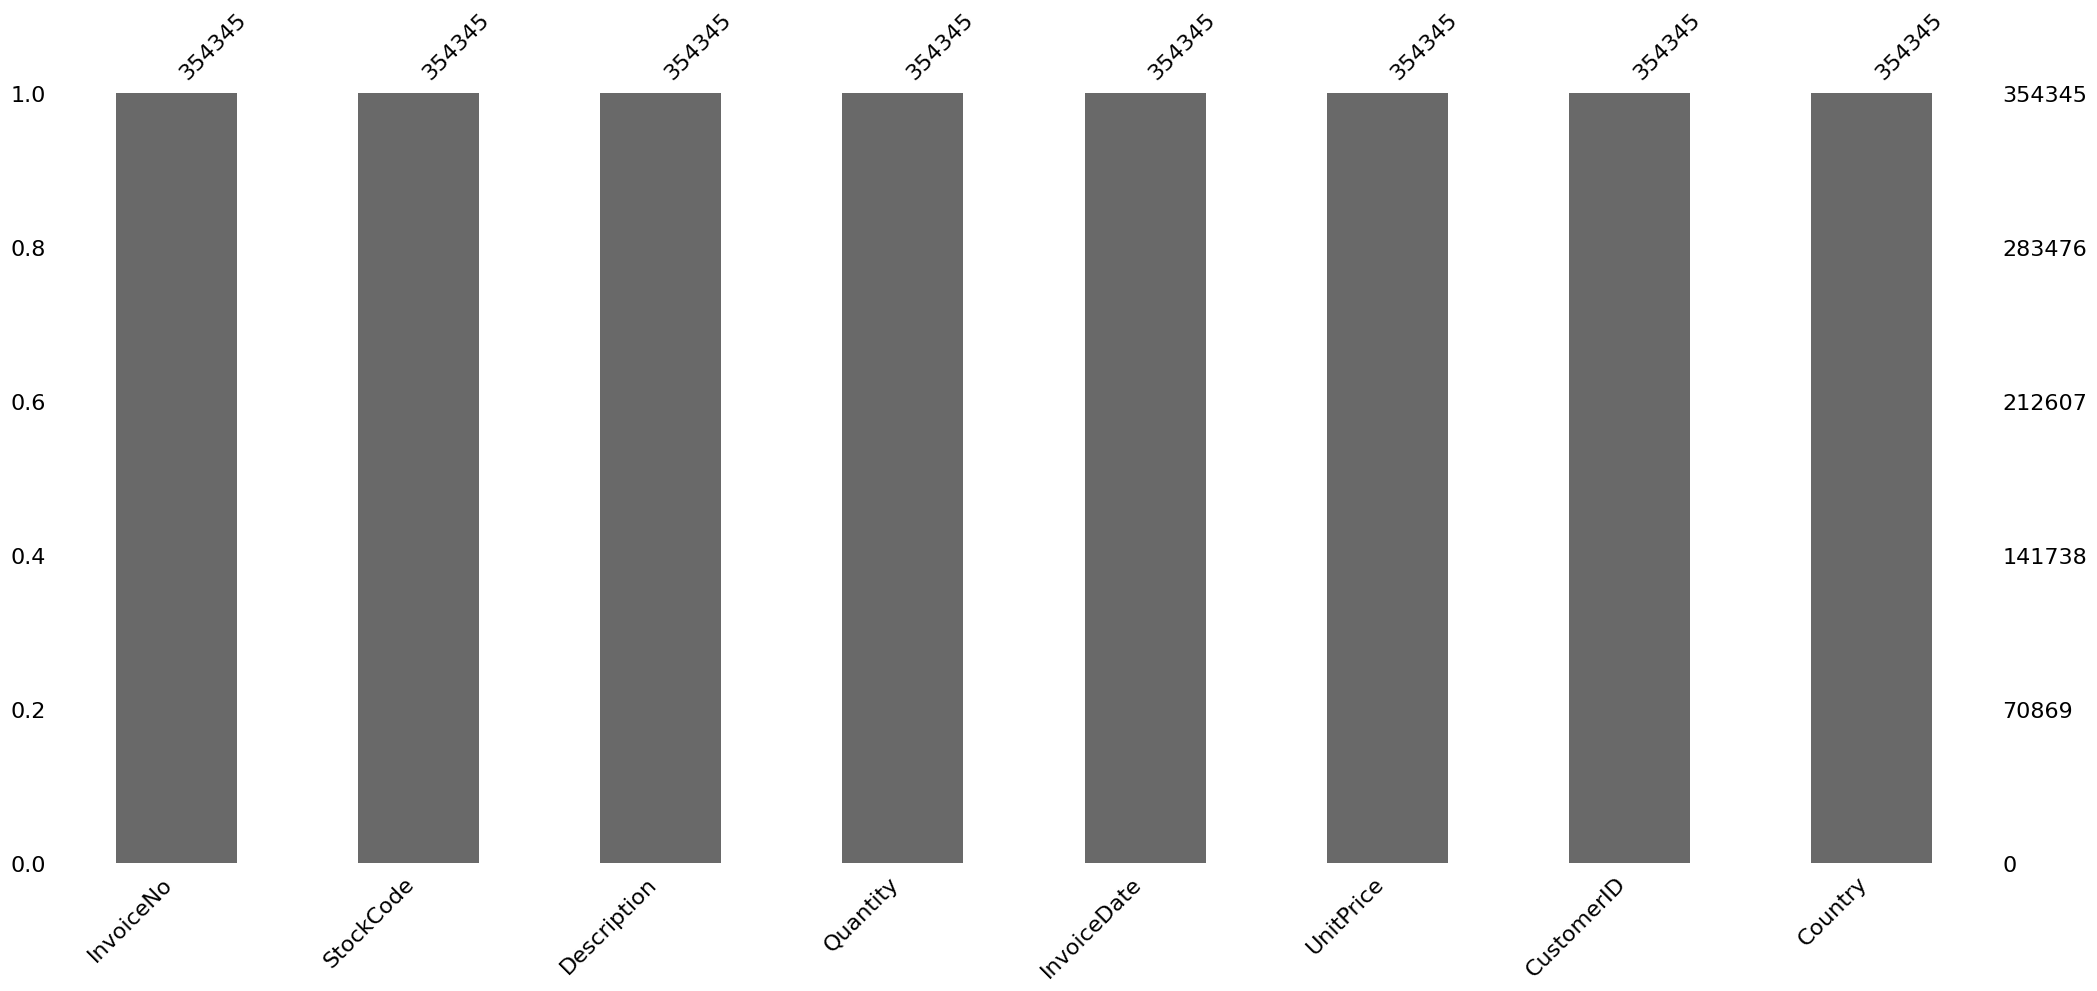

In [ ]:
#Biblioteca para tratar valores faltantes: msno
msno.bar(ventas_generales_df)
plt.show()

#### **3.2. Identificacion de valores atípicos**

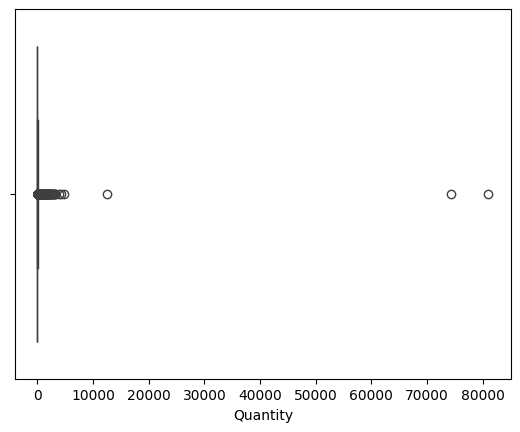

In [ ]:
# data = ventas_varios_sin_faltantes_df
sns.boxplot(x = 'Quantity', data = ventas_generales_df)
plt.show()

In [ ]:
# Verificamos que hay inconsistencias. Quantity no puede ser menor a cero.
ventas_varios_df.Quantity.min()

NameError: name 'ventas_varios_df' is not defined

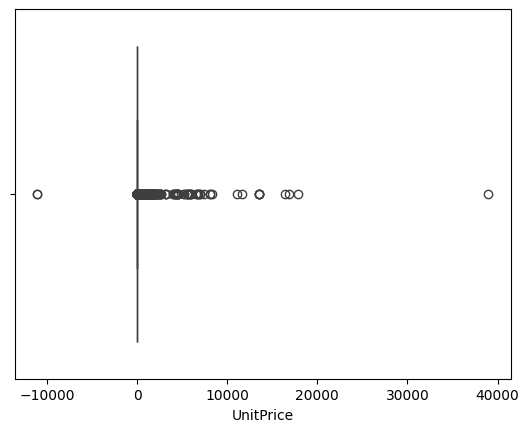

In [ ]:
#
sns.boxplot(x = 'UnitPrice', data = ventas_varios_df)
plt.show()

In [ ]:
# UnitPrice no puede ser menor a cero.
ventas_varios_df.UnitPrice.min()

-11062.06

#### **3.3. Análisis de Correlación***

In [ ]:
# Agregar codigo

#### **3.4. Identificación de Patrones y Tendencias***

 Distribución de frecuencias (Histograma)

In [ ]:
# Agregar código

## <font color='green' style='font-size: 24px;'>Preprocesamiento - Data Wrangling</font>
<hr style='border: 1px solid green;'>

**Contenido de esta sección:**
1. Estandarizar campos
2. Manejo de Valores Faltantes
3. Tratamiento de Outliers
4. Generación de nuevas variables



El término **"Data Wrangling"**, también conocido como **"Data Munging"**, se refiere al proceso de preparar y transformar datos raw (crudos o desorganizados) en un formato adecuado para el análisis o modelado. Es una etapa clave en el flujo de trabajo de análisis de datos y ciencia de datos.

Este proceso generalmente incluye las siguientes tareas:

- **Limpieza de datos**: Manejar valores nulos, duplicados, errores y datos inconsistentes.
- **Transformación de datos**: Cambiar el formato de los datos, como convertir fechas, normalizar valores o estandarizar unidades.
- **Filtrado y selección**: Seleccionar columnas relevantes, filtrar filas específicas o dividir los datos en subconjuntos útiles.
- **Generación de características** (**Feature Engineering**): Crear nuevas variables o características útiles a partir de los datos existentes.
- **Integración de datos**: Combinar diferentes fuentes o tablas en un único conjunto de datos coherente.

En resumen, **Data Wrangling** convierte datos desordenados en datos limpios, estructurados y listos para usarse en análisis o modelos de aprendizaje automático.

###  <font color='red' style='font-size: 24px;'>1. Estandarizar campos (Ejecutar manualmente) </font>
<hr>

#### Preprocesamiento Caso: Ventas sales_data_sample.csv*

In [ ]:
#Seleccionamos las variables a utilizar
#sales_data_sample.csv
ventas_seleccion_df = ventas_varios_df[['ORDERNUMBER', 'ORDERDATE', 'PHONE', 'PRICEEACH', 'QUANTITYORDERED']]

In [ ]:
# Modificar el nombre de algunos campos
ventas_seleccion_df.rename(columns={
    'ORDERNUMBER':'InvoiceNo',
    'ORDERDATE':'InvoiceDate',
    'PHONE':'CustomerID',
    'PRICEEACH':'UnitPrice',
    'QUANTITYORDERED':'Quantity'
}, inplace=True)
ventas_seleccion_df.head()


In [ ]:
#Biblioteca para tratar cadena de caracteres
import re
# Definir la función para eliminar caracteres especiales y espacios
def eliminarCaracteres(CustomerID):
    # Usar una expresión regular para conservar solo dígitos
    return re.sub(r'\D', '', CustomerID)  # \D coincide con todo excepto dígitos

# Aplicar la función a la columna 'CustomerID'
ventas_seleccion_df['CustomerID'] = ventas_seleccion_df['CustomerID'].apply(eliminarCaracteres)

In [ ]:
ventas_df = ventas_seleccion_df # Si se requiere filtrar por algún campo como Pais, Ciudad, ect va aquí

#### Preprocesamiento : Caso ventas ferreteria.csv*

In [ ]:
#ventas_ferreteria
ventas_seleccion_df = ventas_varios_df[['DOCUMENTO', 'FECHA', 'CODCLIENTE', 'TOTAL']]
ventas_seleccion_df['CANTIDAD'] = 1

In [ ]:
# Modificar el nombre de algunos campos
ventas_seleccion_df.rename(columns={
    'DOCUMENTO':'InvoiceNo',
    'FECHA':'InvoiceDate',
    'CODCLIENTE':'CustomerID',
    'TOTAL':'UnitPrice',
    'CANTIDAD':'Quantity'
}, inplace=True)
ventas_seleccion_df.head()


In [ ]:
# Los siguientes cambios deben hacerse en la preparacion de datos crudos
ventas_seleccion_df['UnitPrice'].replace(to_replace=',', value='.', regex=True,inplace=True)
ventas_seleccion_df['UnitPrice'] = ventas_seleccion_df['UnitPrice'].astype(float)
servicios_df = ventas_seleccion_df # Si se requiere filtrar por algún campo como Pais, Ciudad, ect va aquí

#### **Preprocesamiento : Caso ventas OnlineRetail2.csv**

In [10]:
ventas_seleccion_df = ventas_generales_df

In [11]:
# We back to use the df_OnlineRetail dataframe to creating a new dataframe with UK customers only
# En este dataset se incluye las ventas de clientes de diferentes paises, vamos a procesar solo los clientes en UK (United Kingdome)
ventas_df = ventas_seleccion_df.query("Country=='United Kingdom'").reset_index(drop=True)



#### Preprocesamiento: Caso Servicios Telco-Customer-Churn*

In [ ]:
servicios_relevantes_df = servicios_varios_df

In [ ]:
servicios_df = servicios_relevantes_df

#### Preprocesamiento: Caso Servicios Customer-Churn2*

In [ ]:
servicios_relevantes_df = servicios_varios_df

In [ ]:
# Los siguientes cambios deben hacerse en la preparacion de datos crudos
# servicios_relevantes_df['TotalCharges'].replace(to_replace=',', value='.', regex=True,inplace=True)
#servicios_relevantes_df['TotalCharges'] = servicios_relevantes_df['TotalCharges'].astype(float)
servicios_df = servicios_relevantes_df

#### **Estandarizar formato fechas**

<font color='red' style='font-size: 18px;'><b>Nota:</b>Convertir a formato fecha según el caso del dataset</font>

**Cuidado al usar .dt.date:**

**Convertir la columna InvoiceDate al formato datetime64[ns]:** primero debes convertirla a tipo datetime64[ns] antes de realizar cualquier operación de resta. .dt.date está diseñado para extraer solo la parte de fecha (datetime.date) de un objeto datetime64[ns]. Sin embargo, al hacerlo, pierdes la capacidad de trabajar con las herramientas de pandas para fechas, ya que los valores se convierten en objetos de tipo datetime.date.

En general, es mejor trabajar con datetime64[ns] en pandas, ya que permite operaciones de fecha como restas y el uso de .dt.

In [ ]:
# Formato exacto en que se cargaron las fechas ("%d/%m/%Y") y luego indicar formato de trabajo con año a la izquierda
# format= "%d/%m/%Y"
# ventas_df['InvoiceDate'] = pd.to_datetime(ventas_df['InvoiceDate'], format= "%d/%m/%Y", yearfirst=True)


**Convertir a fechas: Caso Ventas OnlineRetail2.csv**

In [12]:
# Indicar el formato exacto en que se cargaron las fechas ("%m/%d/%Y %H:%M") y luego indicar formato de trabajo con año a la izquierda
#ventas_df['InvoiceDate'] = pd.to_datetime(ventas_df['InvoiceDate'], format= "%m/%d/%Y %H:%M", yearfirst=True)
ventas_df['InvoiceDate'] = pd.to_datetime(ventas_df['InvoiceDate'], yearfirst=True)


### <font color='orange' style='font-size: 24px;'>2. Tratamiento de valores faltantes *</font>
<hr>

In [ ]:
# Tomamos 200 muestras al azar de nuestra población
#msno.matrix(ventas_varios_df.sample(200), labels = True, label_rotation = 90)
#plt.show()

In [ ]:
# Analicemos la columna `CustomerID`, que la matriz ya nos da un indicio de gran cantidad de faltantes.
#print('Porcentaje de valores faltantes de la variable CustomerID:', (ventas_varios_df.CustomerID.isnull().sum()/len(ventas_varios_df)) * 100)

In [ ]:
#faltantes_df = ventas_varios_df[ventas_varios_df['CustomerID'].isna()]
#faltantes_df

In [ ]:
ventas_varios_sin_faltantes_df = ventas_df[ventas_df['CustomerID'].notna()]

### <font color='orange' style='font-size: 24px;'>3. Tratamiento de valores atípicos *</font>
<hr>

In [ ]:
# Ya verificamos que hay inconsistencias. Quantity no puede ser menor a cero.
ventas_varios_sin_faltantes_df.Quantity.min()

-80995

In [ ]:
#negativos_df = ventas_varios_sin_faltantes_df.query("Quantity<0").reset_index(drop=True)
#negativos_df

In [ ]:
# Filtrar los valores no negativos
ventas_df = ventas_varios_sin_faltantes_df[ventas_varios_sin_faltantes_df['Quantity'] >= 0]

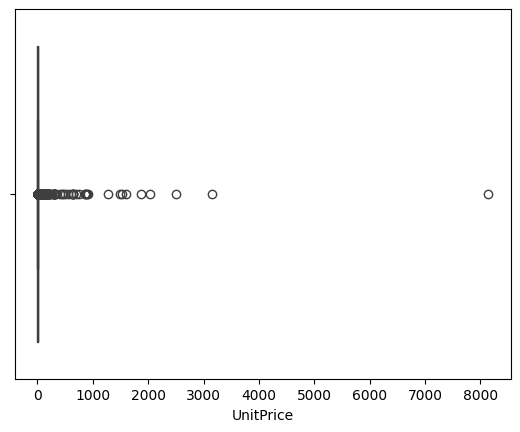

In [ ]:
# Al eliminar los items con valores Quantity negativos observamos que tambien los items con valores UnitPrice negativos fueron filtrados
sns.boxplot(x = 'UnitPrice', data = ventas_df)
plt.show()

### <font color='orange' style='font-size: 24px;'>4. Generación de nuevas variables</font>
<hr>

<font color='red' style='font-size: 18px;'>Nota: </font>

**Crear variable AñoMes por factura**

In [13]:
#creating YearMonth field for the ease of reporting and visualization
ventas_df['InvoiceYearMonth'] = ventas_df['InvoiceDate'].map(lambda date: 100*date.year + date.month)

**Crear variable fecha primera compra por cliente**

In [14]:
# Crear variable  FechaPrimeraCompra y MesAñoPriemeraCompra por cliente
metricas_clientes_df= ventas_generales_df.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()
metricas_clientes_df.columns = ['CustomerID','FechaPrimeraCompra']
#converting the type of Invoice Date Field from string to datetime.
metricas_clientes_df['FechaPrimeraCompra'] = pd.to_datetime(metricas_clientes_df['FechaPrimeraCompra'])
metricas_clientes_df['YearMonthPrimeraCompra'] = metricas_clientes_df['FechaPrimeraCompra'].map(lambda date: 100*date.year + date.month)
metricas_clientes_df.head(10)

,CustomerID,FechaPrimeraCompra,YearMonthPrimeraCompra
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
5,12821.0,2011-05-09 15:51:00,201105
6,12822.0,2011-09-13 13:46:00,201109
7,12823.0,2011-02-16 12:15:00,201102
8,12824.0,2011-10-11 12:49:00,201110
9,12826.0,2010-12-09 15:21:00,201012


**Crear variable cohorte por cliente**

In [15]:
metricas_clientes_df['Cohorte'] = metricas_clientes_df['FechaPrimeraCompra'].map(lambda date: 100*date.year + date.month)

In [16]:
metricas_clientes_df.head(16)

,CustomerID,FechaPrimeraCompra,YearMonthPrimeraCompra,Cohorte
0,12346.0,2011-01-18 10:01:00,201101,201101
1,12747.0,2010-12-05 15:38:00,201012,201012
2,12748.0,2010-12-01 12:48:00,201012,201012
3,12749.0,2011-05-10 15:25:00,201105,201105
4,12820.0,2011-01-17 12:34:00,201101,201101
5,12821.0,2011-05-09 15:51:00,201105,201105
6,12822.0,2011-09-13 13:46:00,201109,201109
7,12823.0,2011-02-16 12:15:00,201102,201102
8,12824.0,2011-10-11 12:49:00,201110,201110
9,12826.0,2010-12-09 15:21:00,201012,201012


**Unir los dataframe ventas_clientes y primera_compra usando el campo llave IdCliente**

In [17]:
ventas_df = pd.merge(ventas_df, metricas_clientes_df, on='CustomerID')

In [18]:
ventas_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,FechaPrimeraCompra,YearMonthPrimeraCompra,Cohorte
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012


Categorizar items de factura  como tipo cliente  Nuevo o tipo cliente Repite Según sea o no primera compra

In [19]:
ventas_df['tipoCliente'] = 'Nuevo'
ventas_df.loc[ventas_df['InvoiceYearMonth']>ventas_df['Cohorte'],'tipoCliente'] = 'Repite'

In [20]:
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354345 entries, 0 to 354344
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   InvoiceNo               354345 non-null  int64         
 1   StockCode               354345 non-null  object        
 2   Description             354345 non-null  object        
 3   Quantity                354345 non-null  int64         
 4   InvoiceDate             354345 non-null  datetime64[ns]
 5   UnitPrice               354345 non-null  float64       
 6   CustomerID              354345 non-null  float64       
 7   Country                 354345 non-null  object        
 8   InvoiceYearMonth        354345 non-null  int64         
 9   FechaPrimeraCompra      354345 non-null  datetime64[ns]
 10  YearMonthPrimeraCompra  354345 non-null  int64         
 11  Cohorte                 354345 non-null  int64         
 12  tipoCliente             354345

In [21]:
ventas_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,FechaPrimeraCompra,YearMonthPrimeraCompra,Cohorte,tipoCliente
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012,Nuevo
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012,Nuevo
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012,Nuevo
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012,Nuevo
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,2010-12-01 08:26:00,201012,201012,Nuevo


## <font color='green' style='font-size: 24px;'>Métricas y KPIs mensuales</font>
<hr style='border: 1px solid green;'>


**Contenido de esta sección:**
1. Monthly Revenue (Ingresos brutos mensuales)
2.  Monthly Invoices (Cantidad de facturas mensuales)
3.  Monthly Order Count (Monthly Order Count (Total productos mensuales))
4.  Average Revenue per Order (Ingreso promedio por pedido mensual)
5.  Monthly Active Customers (Clientes activos mensuales)
6.  Cantidad clientes retenidos por mes
7.  Repeat Purchase Rate - Tasa de retención de clientes
8.  Ingresos mensuales por tipo de cliente (nuevo o retenido en el mes)
9.  New Customer Ratio (Tasa mensual de nuevos clientes)
10.  Monthly Revenue Growth Rate (Tasa de variación mensual de ingresos)
  



### <font color='orange' style='font-size: 24px;'>0. Metricas generales</font>
<hr>

#### **0.1. ¿Cuales son los productos más vendidos? - Which are the most selling products?**

In [51]:
#calculate Revenue for each row and create a new dataframe metricas_mensuales with YearMonth - Revenue columns
mas_vendidos = ventas_df.groupby('Description').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:10]
mas_vendidos

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS,49182
JUMBO BAG RED RETROSPOT,41981
WHITE HANGING HEART T-LIGHT HOLDER,34648
ASSORTED COLOUR BIRD ORNAMENT,32727
POPCORN HOLDER,28935
PACK OF 12 LONDON TISSUES,24337
BROCADE RING PURSE,22711


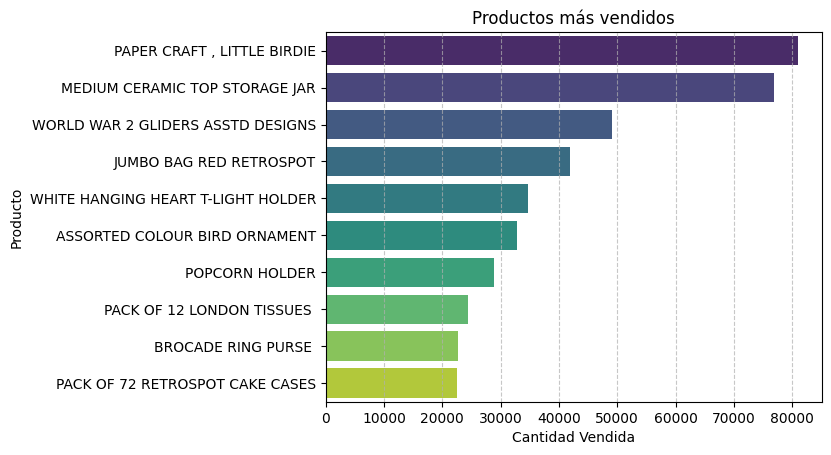

In [59]:
#plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.barplot(x='Quantity', y='Description', data=mas_vendidos.reset_index(), hue='Description', palette="viridis", legend=False)
plt.xlabel("Cantidad Vendida")
plt.ylabel("Producto")
plt.title("Productos más vendidos")
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Líneas de referencia en el eje X
plt.show()

#### **0.2. ¿Cuales son los diez productos con mayor total facturación? - Which are the Top 10 products by sales?**

In [62]:
#mas_volumenes = pd.DataFrame(ventas_df.groupby('Description').sum()['VentaTotal'])
mas_volumenes = ventas_df.groupby('Description').sum(numeric_only=True)[['VentaTotal']]
mas_volumenes.sort_values(by=['VentaTotal'], inplace=True, ascending=False)
mas_volumenes.head(10)

,VentaTotal
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,110990.20
WHITE HANGING HEART T-LIGHT HOLDER,94858.60
MEDIUM CERAMIC TOP STORAGE JAR,80291.44
JUMBO BAG RED RETROSPOT,77371.57
PARTY BUNTING,63109.38
ASSORTED COLOUR BIRD ORNAMENT,52395.99
CHILLI LIGHTS,45505.31
PAPER CHAIN KIT 50'S CHRISTMAS,40451.08


#### **0.3. ¿Cuales son los productos con mayor ganacia? - Which are the most profitable products?**

In [ ]:
##n este Dataframe no contamos con el campo costo por tanto no podemos obtener el campo beneficio
#mayor_ganancia = ventas_df.groupby('Description').sum(numeric_only=True)[['profit']]
#mayor_ganancia.sort_values(by=['profit'], inplace = True, ascending = False)
#mayor_ganancia.head(10)

In [ ]:
#plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
#sns.barplot(x='Quantity', y='Description', data=mas_vendidos.reset_index(), hue='Description', palette="viridis", legend=False)
#plt.xlabel("Ganacia Total")
#plt.ylabel("Producto")
#plt.title("Productos con mayor ganancia")
#plt.grid(axis="x", linestyle="--", alpha=0.7)  # Líneas de referencia en el eje X
#plt.show()

#### **0.4. ¿Cual es la categoria con mayor facturacion? - What category sold the most?**

In [ ]:
# En este dataset no contamos con el campo Categoria de producto
#categorias_masfacturacion = ventas_df.groupby('category').sum(numeric_only=True)[['TotalVentas']]
#categorias_masfacturacion

In [ ]:
#mas_volumenes = pd.DataFrame(ventas_df.groupby('Description').sum()['VentaTotal'])
mas_volumenes = ventas_df.groupby('Description').sum(numeric_only=True)[['VentaTotal']]
mas_volumenes.sort_values(by=['VentaTotal'], inplace=True, ascending=False)
mas_volumenes.head(10)

,VentaTotal
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,110990.20
WHITE HANGING HEART T-LIGHT HOLDER,94858.60
MEDIUM CERAMIC TOP STORAGE JAR,80291.44
JUMBO BAG RED RETROSPOT,77371.57
PARTY BUNTING,63109.38
ASSORTED COLOUR BIRD ORNAMENT,52395.99
CHILLI LIGHTS,45505.31
PAPER CHAIN KIT 50'S CHRISTMAS,40451.08


#### **0.5. ¿Categorias con mayor ganacia? - Which are the most profitable category?**

In [ ]:
#En este dataset no contamos con el campo Categoria de producto ni el campo Beneficio o Costo de producto
#categorias_mayor_ganacia = ventas_df.groupby('category').sum(numeric_only=True)[['profit']]
#categorias_mayor_ganacia.sort_values(by=['profit'], inplace = True, ascending = False)
#categorias_mayor_ganacia

In [ ]:
#plt.figure(figsize=(17, 5))
#plt.bar(categorias_mayor_ganacia['category'],categorias_mayor_ganacia['profit'],color = 'b')
#plt.xticks(size=8)
#plt.show()

#### **0.6. Valores totales por categoría y subcategoría - Total sales values by category and subcategory**

In [ ]:
# En este dataset no contamos con el campo Categoria ni Subcategoria de producto
# ventas_df.groupby(['category','sub_category']).sum(numeric_only=True)

#### **0.7. ¿Cuales son los productos más vendidos en cada subcategoría? - Which are the most selling products in subcategory?**

In [ ]:
# En este dataset no contamos con el campo Categoria ni Subcategoria de producto
# ventas_df.groupby(["category", "sub_category"], as_index=False)["Quantity"].count()

#### **0.8. ¿Que segmentos de clientes generan más beneficios? - Which customer segments are the most profitable?**

In [ ]:
#En este dataset no contamos con el campo Segmento del cliente ni el campo Beneficio o Costo de producto
#segmentos_mayor_beneficio = ventas_df.groupby('segment').sum(numeric_only=True)[['profit']]
#segmentos_mayor_beneficio.sort_values(by=['profit'], inplace = True, ascending = False)
#segmentos_mayor_beneficio

In [ ]:
#sns.barplot(x='segment',y='profit',data=segmentos_mayor_beneficio.reset_index())
#plt.xticks(rotation = 'vertical')

#### **0.9. ¿A que modalidad de envio pertenecen la mayoria de las ventas? - What shipping modes sold the most products?**

In [ ]:
# En este dataset no contamos con el campo ModoDeEnvio
#plt.figure(figsize=(14, 6))
#plt.bar(ventas_df['ship_mode'],ventas_df['VentasTotales'],color = 'b')
#plt.xticks(rotation='vertical', size=8)
#plt.show()

#### **0.10. Visualizar la columna Categoria desde la columna ModoEnvio - Visualize the 'Category' column from the Shipmode column dataset standpoints.**

In [ ]:
# En este dataset no contamos con el campo ModoEnvio
#category_hist = sns.FacetGrid(df, col='ModoEnvio', palette='rainbow')
#category_hist.map(plt.hist, 'category')

#### **0.11. A que mercado pertenecen los productos más vendidos? What market sold the most products?**

In [ ]:
# En este dataset no contamos con el campo Mercado
#sns.set_style('whitegrid')
#sns.countplot(x='market',data=ventas_df, palette='rainbow')

#### **0.12. ¿Cuales son los diez primeros paises con más ventas? - Which are the Top 10 country by sales?**

In [67]:
#Esta dataset fue filtrado al principio por Country=='United Kingdom'
paises_mayores_ventas = ventas_generales_df.groupby('Country').agg({'Quantity': 'sum'}).sort_values('Quantity',ascending=False)[:10]
paises_mayores_ventas.head(10)

,Quantity
Country,
United Kingdom,4269472


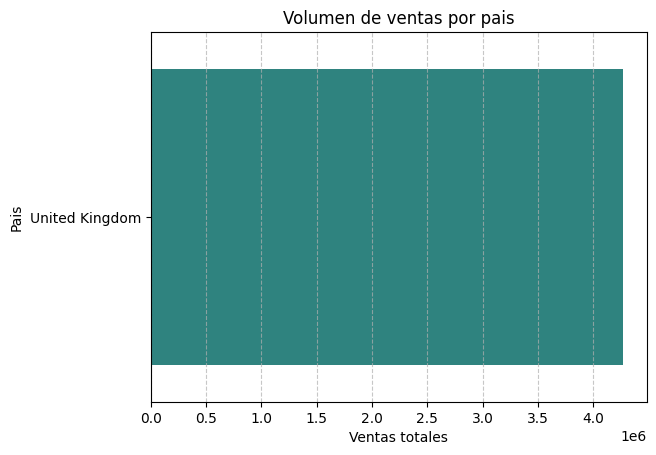

In [69]:
#plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico
sns.barplot(x='Quantity', y='Country', data=paises_mayores_ventas.reset_index(), hue='Country', palette="viridis", legend=False)
plt.xlabel("Ventas totales")
plt.ylabel("Pais")
plt.title("Volumen de ventas por pais")
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Líneas de referencia en el eje X
plt.show()

#### **0.13. ¿Cual es el costo de envio promedio por pais?- Which are the average shipping cost for top 10 different countries?**

In [ ]:
#En este dataset no contamos con el campo CostoEnvio
#costos_envios_pais = ventas_df.groupby('Country').agg({'shipping_cost':'mean'}).sort_values('shipping_cost',ascending=False)[:10]
#costos_envios_pais

#### **0.14. ¿Cuales son los diez primeros clientes más rentables? - Who are the top-10 most profitable customers?**

In [ ]:
#En este dataset no contamos con el campo Costo ni Beneficio
clientes_mas_rentables = ventas_df.sort_values('profit',ascending=False).head(10)[['InvoiceNo ','CustomerID','profit']]
clientes_mas_rentables

#### **0.15.crear columnas Mes y Anio de tipos enteros - Add int columns (Month and Year)**

In [ ]:
#Aqui se usó el dataframe ventas_generales_df para probar estas operaciones sin alterar el dataframe ventas_df
month = ventas_generales_df['InvoiceDate'].astype(str)
month = month.apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
ventas_generales_df['Mes'] = month.map(lambda x: x.month)
ventas_generales_df['Anio'] = month.map(lambda x: x.year)


#### **0.16. Total Ventas por año y mes - Total sales values by year and month**

In [82]:
#Aqui se usó el dataframe ventas_generales_df para probar estas operaciones sin alterar el dataframe ventas_df
ventas_mensuales = ventas_generales_df.groupby(['Anio','Mes']).sum(numeric_only=True)[['Quantity']]
ventas_mensuales.head(10)

Quantity
Anio Mes          
2010 12     267771
2011 1      278300
     2      213391
     3      276345
     4      260450
     5      301828
     6      280974
     7      303602
     8      310832
     9      454561

#### **0.17. Gráfico de ventas totales al año - Total sales chart by the year**

([0, 1], [Text(0, 0, '2010'), Text(1, 0, '2011')])

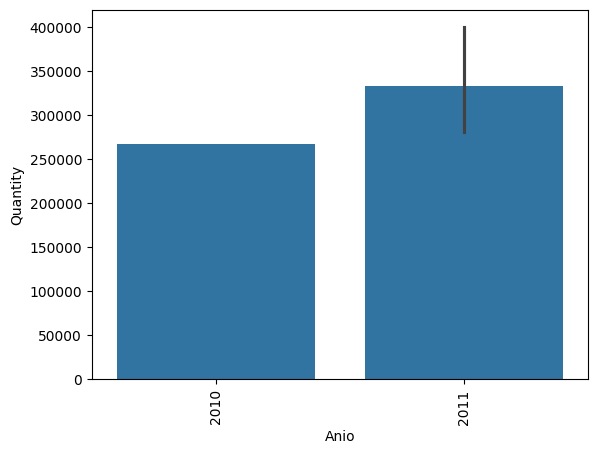

In [83]:
#Se trabajo con Cantidad de ventas de ventas_generales para probar pero se debe usar VentasTotales de ventas_df
sns.barplot(x='Anio',y='Quantity',data=ventas_mensuales.reset_index())
plt.xticks(rotation = 'vertical')

### <font color='orange' style='font-size: 24px;'>1. Monthly Revenue (Ingresos brutos mensuales)</font>
<hr>

In [ ]:
#calculate Revenue for each row and create a new dataframe metricas_mensuales with YearMonth - Revenue columns
ventas_df['VentaTotal'] = ventas_df['UnitPrice'] * ventas_df['Quantity']
metricas_mensuales_df = ventas_df.groupby('InvoiceYearMonth')['VentaTotal'].sum().reset_index()
metricas_mensuales_df.columns =['YearMonth','IngresoBruto']
metricas_mensuales_df

,YearMonth,IngresoBruto
0,201012,498661.850
1,201101,442190.060
2,201102,355655.630
3,201103,467198.590
4,201104,409559.141
5,201105,551568.820
6,201106,524915.480
7,201107,485612.251
8,201108,498453.320
9,201109,796780.272


In [ ]:
#Filtramos solo para mostrar meses relevantes en el gráfico
ingresos_mensuales = metricas_mensuales_df.query("YearMonth != 201012 and YearMonth != 201112")
plot_data = [
    go.Scatter(
        x=ingresos_mensuales['YearMonth'],
        y=ingresos_mensuales['IngresoBruto'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Ingreso bruto mensual'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# Mostrar el gráfico con el renderizador 'colab'
fig.show(renderer="colab")
# Note Runtime error: chart is displayed blank, solution: Entorno de trabajo para Google Colab

### <font color='orange' style='font-size: 24px;'>2. Monthly Invoices (Cantidad de facturas mensuales)</font>
<hr>

In [24]:
facturas_mes= ventas_df.groupby('InvoiceYearMonth')['InvoiceNo'].nunique().reset_index()
facturas_mes.columns =['YearMonth','InvoiceNo']
metricas_mensuales_df['CantidadFacturas'] = facturas_mes['InvoiceNo']
metricas_mensuales_df

,YearMonth,IngresoBruto,CantidadFacturas
0,201012,498661.850,1291
1,201101,442190.060,874
2,201102,355655.630,897
3,201103,467198.590,1177
4,201104,409559.141,1058
5,201105,551568.820,1403
6,201106,524915.480,1249
7,201107,485612.251,1200
8,201108,498453.320,1133
9,201109,796780.272,1569


### <font color='orange' style='font-size: 24px;'>3. Monthly Order Count (Total productos mensuales)</font>
<hr>

<font color='red' style='font-size: 18px;'>E01-05 Revisar cálculos</font>

In [25]:
#create a new dataframe for no. of order by using quantity field
pedidos_mes = ventas_df.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

pedidos_mes.columns =['YearMonth','Quantity']
metricas_mensuales_df['TotalProductos'] = pedidos_mes['Quantity']
metricas_mensuales_df

,YearMonth,IngresoBruto,CantidadFacturas,TotalProductos
0,201012,498661.850,1291,267771
1,201101,442190.060,874,278300
2,201102,355655.630,897,213391
3,201103,467198.590,1177,276345
4,201104,409559.141,1058,260450
5,201105,551568.820,1403,301828
6,201106,524915.480,1249,280974
7,201107,485612.251,1200,303602
8,201108,498453.320,1133,310832
9,201109,796780.272,1569,454561


In [26]:
#plot
plot_data = [
    go.Bar(
        x=metricas_mensuales_df['YearMonth'],
        y=metricas_mensuales_df['TotalProductos'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Total productos vendidos por mes'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
# Mostrar el gráfico con el renderizador 'colab'
fig.show(renderer="colab")
# Note Runtime error: chart is displayed blank, solution: Entorno de trabajo para Google Colab

### <font color='orange' style='font-size: 24px;'>4. Average Revenue per Order (Ingreso promedio por pedido mensual)</font>
<hr>

<font color='red' style='font-size: 18px;'>Revisar cálculos</font>


In [27]:
# create a new dataframe for average revenue by taking the mean of it
ingreso_promedio_item = ventas_df.groupby('InvoiceYearMonth')['VentaTotal'].mean().reset_index()
# ingreso_promedio_factura.columns('InvoiceYearMonth','VentaTotal')
metricas_mensuales_df['IngresoPromedioItem'] = ingreso_promedio_item['VentaTotal']
metricas_mensuales_df

,YearMonth,IngresoBruto,CantidadFacturas,TotalProductos,IngresoPromedioItem
0,201012,498661.850,1291,267771,20.827041
1,201101,442190.060,874,278300,24.348332
2,201102,355655.630,897,213391,20.026782
3,201103,467198.590,1177,276345,19.455259
4,201104,409559.141,1058,260450,19.628062
5,201105,551568.820,1403,301828,21.885046
6,201106,524915.480,1249,280974,22.135257
7,201107,485612.251,1200,303602,20.577662
8,201108,498453.320,1133,310832,21.573396
9,201109,796780.272,1569,454561,22.358858


### <font color='orange' style='font-size: 24px;'>5. Monthly Active Customers (Clientes activos mensuales)</font>
<hr>

In [28]:
#creating monthly active customers dataframe by counting unique Customer IDs
clientes_mensuales_df = ventas_df.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
metricas_mensuales_df['ClientesActivos'] = clientes_mensuales_df['CustomerID']
#print the dataframe
metricas_mensuales_df

,YearMonth,IngresoBruto,CantidadFacturas,TotalProductos,IngresoPromedioItem,ClientesActivos
0,201012,498661.850,1291,267771,20.827041,815
1,201101,442190.060,874,278300,24.348332,647
2,201102,355655.630,897,213391,20.026782,679
3,201103,467198.590,1177,276345,19.455259,880
4,201104,409559.141,1058,260450,19.628062,784
5,201105,551568.820,1403,301828,21.885046,962
6,201106,524915.480,1249,280974,22.135257,889
7,201107,485612.251,1200,303602,20.577662,859
8,201108,498453.320,1133,310832,21.573396,834
9,201109,796780.272,1569,454561,22.358858,1146


In [29]:
#plotting the output
plot_data = [
    go.Bar(
        x=metricas_mensuales_df['YearMonth'],
        y=metricas_mensuales_df['ClientesActivos'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Clientes activos por mes en UK'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
# Mostrar el gráfico con el renderizador 'colab'
fig.show(renderer="colab")
# Note Runtime error: chart is displayed blank, solution: Entorno de trabajo para Google Colab

### <font color='orange' style='font-size: 24px;'>6. Cantidad clientes retenidos por mes</font>
<hr>

<font color='green' style='font-size: 18px;'><b>Nota</b>: Se movió hacia este lugar el procedimiento para calcular clientes retenidos</font>

In [30]:
#identify which users are active by looking at their revenue per month
compras_clientes = ventas_df.groupby(['CustomerID','InvoiceYearMonth'])['VentaTotal'].sum().reset_index()
compras_clientes.head()

,CustomerID,InvoiceYearMonth,VentaTotal
0,12346.0,201101,77183.60
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31


In [31]:
#create retention matrix with crosstab
matriz_retenciones = pd.crosstab(compras_clientes['CustomerID'], compras_clientes['InvoiceYearMonth']).reset_index()
matriz_retenciones.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


<font color='red' style='font-size: 18px;'>Verificar: ¿Cual es la diferencia entre ClientesActivos y totalClientes?</font>

In [32]:
# Se deberian almacenar los resultados en dataframe tasas_mensuales_df
#create an array of dictionary which keeps Retained & Total User count for each month
months = matriz_retenciones.columns[2:]
retention_array = [] # List that will contain the dictionaries of retained clients
for i in range(len(months)-1):
    retention_data = {} # Dictionary that will contain the data of a retained client
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalClientes'] = matriz_retenciones[selected_month].sum()
    # Cliente retenido del mes solo si compró en el mes actual y el anterior consecutivo
    retention_data['ClientesRetenidos'] = matriz_retenciones[(matriz_retenciones[selected_month]>0) & (matriz_retenciones[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)

#convert the array to dataframe and calculate Retention Rate
retenciones_df = pd.DataFrame(retention_array)
metricas_mensuales_df['TotalClientes'] = retenciones_df['TotalClientes']
metricas_mensuales_df['ClientesRetenidos'] = retenciones_df['ClientesRetenidos']
metricas_mensuales_df.head()

,YearMonth,IngresoBruto,CantidadFacturas,TotalProductos,IngresoPromedioItem,ClientesActivos,TotalClientes,ClientesRetenidos
0,201012,498661.850,1291,267771,20.827041,815,679.0,233.0
1,201101,442190.060,874,278300,24.348332,647,880.0,254.0
2,201102,355655.630,897,213391,20.026782,679,784.0,274.0
3,201103,467198.590,1177,276345,19.455259,880,962.0,340.0
4,201104,409559.141,1058,260450,19.628062,784,889.0,368.0


In [33]:
metricas_mensuales_df

,YearMonth,IngresoBruto,CantidadFacturas,TotalProductos,IngresoPromedioItem,ClientesActivos,TotalClientes,ClientesRetenidos
0,201012,498661.850,1291,267771,20.827041,815,679.0,233.0
1,201101,442190.060,874,278300,24.348332,647,880.0,254.0
2,201102,355655.630,897,213391,20.026782,679,784.0,274.0
3,201103,467198.590,1177,276345,19.455259,880,962.0,340.0
4,201104,409559.141,1058,260450,19.628062,784,889.0,368.0
5,201105,551568.820,1403,301828,21.885046,962,859.0,335.0
6,201106,524915.480,1249,280974,22.135257,889,834.0,354.0
7,201107,485612.251,1200,303602,20.577662,859,1146.0,388.0
8,201108,498453.320,1133,310832,21.573396,834,1230.0,445.0
9,201109,796780.272,1569,454561,22.358858,1146,1506.0,554.0


### <font color='orange' style='font-size: 24px;'>7. Repeat Purchase Rate - Tasa de retención mensual</font>
<hr>

In [34]:
tasas_mensuales_df = metricas_mensuales_df['YearMonth'].reset_index()
tasas_mensuales_df['TasaRetencion'] = metricas_mensuales_df['ClientesRetenidos']/metricas_mensuales_df['TotalClientes']
tasas_mensuales_df

,index,YearMonth,TasaRetencion
0,0,201012,0.343152
1,1,201101,0.288636
2,2,201102,0.349490
3,3,201103,0.353430
4,4,201104,0.413948
5,5,201105,0.389988
6,6,201106,0.424460
7,7,201107,0.338569
8,8,201108,0.361789
9,9,201109,0.367862


In [35]:
#plot the retention rate graph
plot_data = [
    go.Scatter(
        x=tasas_mensuales_df.query("YearMonth<201112")['YearMonth'],
        y=tasas_mensuales_df.query("YearMonth<201112")['TasaRetencion'],
        name="organic"
    )

]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Tasa de retención mensual'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# Mostrar el gráfico con el renderizador 'colab'
fig.show(renderer="colab")
# Note Runtime error: chart is displayed blank, solution: Entorno de trabajo para Google Colab

### <font color='orange' style='font-size: 24px;'>8. Ingresos mensuales por tipo de cliente (nuevo o repite)</font>
<hr>

In [36]:
ingresos_mensual_portipo_cliente_df =  ventas_df.groupby(['InvoiceYearMonth','tipoCliente'])['VentaTotal'].sum().reset_index()
ingresos_mensual_portipo_cliente_df.head()

,InvoiceYearMonth,tipoCliente,VentaTotal
0,201012,Nuevo,498661.85
1,201101,Nuevo,242600.15
2,201101,Repite,199589.91
3,201102,Nuevo,136059.30
4,201102,Repite,219596.33


In [37]:
#Filtramos solo para mostrar meses relevantes en el gráfico
ingresos_mensuales_tipos = ingresos_mensual_portipo_cliente_df.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
plot_data = [
    go.Scatter(
        x=ingresos_mensuales_tipos.query("tipoCliente == 'Repite'")['InvoiceYearMonth'],
        y=ingresos_mensuales_tipos.query("tipoCliente == 'Repite'")['VentaTotal'],
        name = 'Existing'
    ),
    go.Scatter(
        x=ingresos_mensuales_tipos.query("tipoCliente == 'Nuevo'")['InvoiceYearMonth'],
        y=ingresos_mensuales_tipos.query("tipoCliente == 'Nuevo'")['VentaTotal'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Ingresos por clientes nuevos vs repiten'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# Mostrar el gráfico con el renderizador 'colab'
fig.show(renderer="colab")
# Note Runtime error: chart is displayed blank, solution: Entorno de trabajo para Google Colab

### <font color='orange' style='font-size: 24px;'>9. New Customer Ratio (Tasa mensual de nuevos clientes)</font>
<hr>

In [38]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tasa_nuevos = ventas_df.query("tipoCliente == 'Nuevo'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/ventas_df.query("tipoCliente == 'Repite'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
tasa_nuevos = tasa_nuevos.reset_index()
tasa_nuevos = tasa_nuevos.dropna()
tasas_mensuales_df['TasaClientesNuevos'] = tasa_nuevos['CustomerID']
tasas_mensuales_df.head()



,index,YearMonth,TasaRetencion,TasaClientesNuevos
0,0,201012,0.343152,NaN
1,1,201101,0.288636,1.238754
2,2,201102,0.349490,1.002950
3,3,201103,0.353430,0.908894
4,4,201104,0.413948,0.546351


In [39]:
# La tabla Metricas mensuales contiene metricas que permiten calcular diferentes tasas a partir de formulas como la siguiente
metricas_mensuales_df['ClientesNuevos'] = metricas_mensuales_df['ClientesActivos'] - metricas_mensuales_df['ClientesRetenidos']
tasas_mensuales_df['TasaClientesNuevos'] = metricas_mensuales_df['ClientesNuevos'] / metricas_mensuales_df['ClientesRetenidos']
tasas_mensuales_df = tasas_mensuales_df.dropna()
#showing first 5 rows
tasas_mensuales_df.head()

,index,YearMonth,TasaRetencion,TasaClientesNuevos
0,0,201012,0.343152,2.497854
1,1,201101,0.288636,1.547244
2,2,201102,0.349490,1.478102
3,3,201103,0.353430,1.588235
4,4,201104,0.413948,1.130435


In [40]:
plot_data = [
    go.Bar(
        x=tasas_mensuales_df.query("YearMonth>201101 and YearMonth<201112")['YearMonth'],
        y=tasas_mensuales_df.query("YearMonth>201101 and YearMonth<201112")['TasaClientesNuevos'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Tasa de clientes nuevos'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
# Mostrar el gráfico con el renderizador 'colab'
fig.show(renderer="colab")
# Note Runtime error: chart is displayed blank, solution: Entorno de trabajo para Google Colab

### <font color='orange' style='font-size: 24px;'>10. Monthly Revenue Growth Rate (Tasa de variación mensual de ingresos)</font>
<hr>

<font color='red' style='font-size: 18px;'>Revisar Tasas de variación ingresos </font>


In [41]:
#using pct_change() function to see monthly percentage change
#metricas_mensuales_df['TasaVariacionIngresos'] = metricas_mensuales_df['IngresoBruto'].pct_change()

#showing first 5 rows
#metricas_mensuales_df.head()

In [42]:
#tasas_mensuales_df = metricas_mensuales_df['YearMonth'].reset_index()
#using pct_change() function to see monthly percentage change
tasas_mensuales_df['TasaVariacionIngresos'] = metricas_mensuales_df['IngresoBruto'].pct_change().copy()
#variaciones_mensuales_df.columns =['AñosMes','VariacionIngresos']
tasas_mensuales_df = tasas_mensuales_df.dropna()
#showing first 5 rows
tasas_mensuales_df.head()

<ipython-input-42-0fa5e3dc3d34>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,YearMonth,TasaRetencion,TasaClientesNuevos,TasaVariacionIngresos
1,1,201101,0.288636,1.547244,-0.113247
2,2,201102,0.349490,1.478102,-0.195695
3,3,201103,0.353430,1.588235,0.313626
4,4,201104,0.413948,1.130435,-0.123372
5,5,201105,0.389988,1.871642,0.346738


In [43]:
#visualization - line graph
plot_data = [
    go.Scatter(
        x=tasas_mensuales_df.query("YearMonth < 201112")['YearMonth'],
        y=tasas_mensuales_df.query("YearMonth < 201112")['TasaVariacionIngresos'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Tasa de variación mensual de ingresos'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
# Mostrar el gráfico con el renderizador 'colab'
fig.show(renderer="colab")
# Note Runtime error: chart is displayed blank, solution: Entorno de trabajo para Google Colab

## <font color='green' style='font-size: 24px;'>Métricas y KPIs por cliente</font>
<hr style='border: 1px solid green;'>

**Contenido de esta sección:**
1. Ingresos total por cliente
2. ARPU - Ingresos promedio mensual por cliente
3. LTV -  Tiempo de Vida de Valor por cliente
4. CAC (Customer Acquisition Cost - Costo de adquisicion por cliente) *
5. Margen de ganancia por cliente *
6. CLV (Customer Lifetime Value - Tiempo de vida de valor del cliente) *

### <font color='orange' style='font-size: 24px;'>1. Ingresos total por cliente</font>
<hr>

In [44]:
ingresos_clientes_df = ventas_df.groupby(['CustomerID']).agg({'VentaTotal':'sum'}).reset_index()
ingresos_clientes_df.columns = ['CustomerID','IngresosTotal']
metricas_clientes_df = pd.merge(metricas_clientes_df, ingresos_clientes_df,  on='CustomerID')
metricas_clientes_df

,CustomerID,FechaPrimeraCompra,YearMonthPrimeraCompra,Cohorte,IngresosTotal
0,12346.0,2011-01-18 10:01:00,201101,201101,77183.60
1,12747.0,2010-12-05 15:38:00,201012,201012,4196.01
2,12748.0,2010-12-01 12:48:00,201012,201012,33719.73
3,12749.0,2011-05-10 15:25:00,201105,201105,4090.88
4,12820.0,2011-01-17 12:34:00,201101,201101,942.34
...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,201103,201103,180.60
3917,18281.0,2011-06-12 10:53:00,201106,201106,80.82
3918,18282.0,2011-08-05 13:35:00,201108,201108,178.05
3919,18283.0,2011-01-06 14:14:00,201101,201101,2094.88


### <font color='orange' style='font-size: 24px;'>2. ARPU - Ingresos promedio mensual por cliente</font>
<hr>

In [45]:
meses_unicos =  ventas_df[['CustomerID', 'InvoiceYearMonth']].drop_duplicates()
meses_por_clientes_df = meses_unicos.groupby(['CustomerID']).size().reset_index()
meses_por_clientes_df.columns = ['CustomerID','MesesDeCompras']
meses_por_clientes_df
metricas_clientes_df = pd.merge(metricas_clientes_df, meses_por_clientes_df,  on='CustomerID')
metricas_clientes_df['ARPUCliente'] = metricas_clientes_df['IngresosTotal'] / metricas_clientes_df['MesesDeCompras']
metricas_clientes_df

,CustomerID,FechaPrimeraCompra,YearMonthPrimeraCompra,Cohorte,IngresosTotal,MesesDeCompras,ARPUCliente
0,12346.0,2011-01-18 10:01:00,201101,201101,77183.60,1,77183.600000
1,12747.0,2010-12-05 15:38:00,201012,201012,4196.01,9,466.223333
2,12748.0,2010-12-01 12:48:00,201012,201012,33719.73,13,2593.825385
3,12749.0,2011-05-10 15:25:00,201105,201105,4090.88,4,1022.720000
4,12820.0,2011-01-17 12:34:00,201101,201101,942.34,4,235.585000
...,...,...,...,...,...,...,...
3916,18280.0,2011-03-07 09:52:00,201103,201103,180.60,1,180.600000
3917,18281.0,2011-06-12 10:53:00,201106,201106,80.82,1,80.820000
3918,18282.0,2011-08-05 13:35:00,201108,201108,178.05,2,89.025000
3919,18283.0,2011-01-06 14:14:00,201101,201101,2094.88,10,209.488000


### <font color='orange' style='font-size: 24px;'>3. LTV - Tiempo de Vida de Valor por cliente *</font>
<hr>

### <font color='orange' style='font-size: 24px;'>4. CAC (Customer Acquisition Cost - Costo de adquisicion por cliente) *</font>
<hr>

### <font color='orange' style='font-size: 24px;'>5. Margen de ganancia por cliente *</font>
<hr>

### <font color='orange' style='font-size: 24px;'>6. CLV (Customer Lifetime Value - Tiempo de vida de valor del cliente) *</font>
<hr>

## <font color='green' style='font-size: 24px;'>Métricas y KPIs por cohorte</font>
<hr style='border: 1px solid green;'>


**Contenido de esta sección:**
1. Cantidad de clientes por cohorte *
2. Cohort Based Retention Rate (Tasa de retención por cohorte)
3. Tasa de deserción por cohorte - Cohort Based Churn Rate *
4. LTV de la cohorte *

### <font color='orange' style='font-size: 24px;'>1. Cantidad de clientes por cohorte *</font>
<hr>

### <font color='orange' style='font-size: 24px;'>2. Cohort Based Retention Rate (Tasas de retención por cohorte)</font>
<hr>

In [46]:
#uk_retention = pd.crosstab(compras_clientes['CustomerID'], compras_clientes['InvoiceYearMonth']).reset_index()
#uk_retention

In [47]:
#uk_retention = pd.merge(uk_retention,metricas_clientes_df [['CustomerID','YearMonthPrimeraCompra']],on='CustomerID')
#uk_retention

In [48]:
#create our retention table again with crosstab() and add firs purchase year month view
uk_retention = pd.crosstab(compras_clientes['CustomerID'], compras_clientes['InvoiceYearMonth']).reset_index()
uk_retention = pd.merge(uk_retention,metricas_clientes_df [['CustomerID','YearMonthPrimeraCompra']],on='CustomerID')
new_column_names = [ 'm_' + str(column) for column in uk_retention.columns[:-1]]
new_column_names.append('YearMonthPrimeraCompra')
uk_retention.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan

    total_user_count = uk_retention[uk_retention.YearMonthPrimeraCompra ==  selected_month].YearMonthPrimeraCompra.count()
    retention_data['ClientesCohorte'] = total_user_count
    retention_data[selected_month] = 1

    query = "YearMonthPrimeraCompra == {}".format(selected_month)


    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(uk_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)

retencion_cohortes_df = pd.DataFrame(retention_array)
retencion_cohortes_df.index = months

#showing new cohort based retention table
retencion_cohortes_df

,ClientesCohorte,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,358,1.0,0.21,0.26,0.23,0.33,0.28,0.25,0.24,0.30,0.33,0.35,0.12
201102,340,NaN,1.00,0.19,0.19,0.29,0.29,0.25,0.26,0.28,0.26,0.31,0.07
201103,419,NaN,NaN,1.00,0.15,0.26,0.20,0.22,0.16,0.26,0.23,0.28,0.09
201104,277,NaN,NaN,NaN,1.00,0.21,0.20,0.22,0.20,0.22,0.22,0.26,0.07
201105,256,NaN,NaN,NaN,NaN,1.00,0.19,0.17,0.17,0.21,0.23,0.27,0.09
201106,214,NaN,NaN,NaN,NaN,NaN,1.00,0.18,0.14,0.24,0.24,0.32,0.10
201107,169,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.18,0.20,0.23,0.28,0.11
201108,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.23,0.23,0.24,0.12
201109,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.23,0.30,0.12


### <font color='orange' style='font-size: 24px;'>3. Tasa de deserción por cohorte - Cohort Based Churn Rate *</font>
<hr>

### <font color='orange' style='font-size: 24px;'>4. LTV de la cohorte *</font>
<hr>

## <font color='green' style='font-size: 24px;'>Guardar resultados</font>
<hr style='border: 1px solid green;'>

In [ ]:
# Guardarmos el DataFrame en un archivo CSV
tasas_mensuales_df.to_csv(folder_datasets_path+'tasas_mensuales_'+sales_data_file, index=False)

In [ ]:
# Guardarmos el DataFrame en un archivo CSV
metricas_clientes_df.to_csv(folder_datasets_path+'metricas_clientes_'+sales_data_file, index=False)

In [ ]:
# Guardarmos el DataFrame en un archivo CSV
metricas_mensuales_df.to_csv(folder_datasets_path+'metricas_mensuales_'+sales_data_file, index=False)

In [ ]:
# Guardarmos el DataFrame en un archivo CSV
retencion_cohortes_df.to_csv(folder_datasets_path+'retencion_cohortes_'+sales_data_file, index=False)